In [8]:
!pip install -U git+https://github.com/eduardchai/textgenrnn.git

  Cloning https://github.com/eduardchai/textgenrnn.git to /tmp/pip-req-build-42ewmk58
  Running command git clone -q https://github.com/eduardchai/textgenrnn.git /tmp/pip-req-build-42ewmk58
     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 3.9MB 51.9MB/s 
     |████████████████████████████████| 450kB 49.1MB/s 
  Created wheel for textgenrnn: filename=textgenrnn-2.0.0-cp36-none-any.whl size=1734419 sha256=7eb3c4f8b38ae6f99e1c59f643c5a61ca029ed61c499716677f226c0b5185c18
  Stored in directory: /tmp/pip-ephem-wheel-cache-ia2upyxn/wheels/cc/88/c2/6134006d4228227753f339dc536147f1221fb5df584e2a63d2
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=391057f50b1e29d7c4e670efdde57265f3bb7d6748741a8fc09a6f76681d3ad7
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built textgenrnn gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3

In [1]:
%tensorflow_version 1.x
from textgenrnn import textgenrnn

TensorFlow 1.x selected.


## Train new model - char embedding

In [0]:
textgen_word = textgenrnn(name="word_level")

In [4]:
textgen_word.reset()
textgen_word.train_from_file('clean_reviews_sample.txt',
                        new_model=True,
                        rnn_bidirectional=True,
                        rnn_size=128,
                        rnn_layers=2,
                        dim_embeddings=300,
                        num_epochs=100,
                        max_words=3000,
                        gen_epochs=50,
                        word_level=True,
                        header=False)

100 texts collected.
Training new model w/ 2-layer, 128-cell Bidirectional LSTMs
Training on 21,311 word sequences.
  ...
    to  
  ['...']
Train for 166 steps
Epoch 1/100
166/166 [==============================] - 10s 63ms/step - loss: 6.6852
Epoch 2/100
166/166 [==============================] - 6s 35ms/step - loss: 6.2718
Epoch 3/100
166/166 [==============================] - 6s 35ms/step - loss: 5.7040
Epoch 4/100
166/166 [==============================] - 6s 34ms/step - loss: 4.7008
Epoch 5/100
166/166 [==============================] - 6s 34ms/step - loss: 3.7383
Epoch 6/100
166/166 [==============================] - 6s 34ms/step - loss: 2.9835
Epoch 7/100
166/166 [==============================] - 6s 34ms/step - loss: 2.3757
Epoch 8/100
166/166 [==============================] - 6s 35ms/step - loss: 1.9381
Epoch 9/100
166/166 [==============================] - 6s 34ms/step - loss: 1.5546
Epoch 10/100
166/166 [==============================] - 6s 35ms/step - loss: 1.3020
Epoch 1

In [5]:
textgen_word.model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 40)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 40, 300)      900600      input[0][0]                      
__________________________________________________________________________________________________
rnn_1 (Bidirectional)           (None, 40, 256)      439296      embedding[0][0]                  
__________________________________________________________________________________________________
rnn_2 (Bidirectional)           (None, 40, 256)      394240      rnn_1[0][0]                      
____________________________________________________________________________________________

### Loss

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(12, 8)})

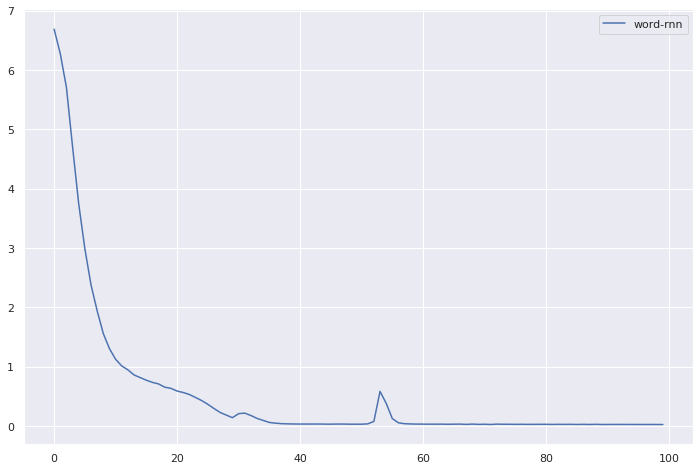

In [7]:
plt.plot(textgen_word.history.history["loss"],  label='word-rnn')
plt.legend(loc='upper right')
plt.show()

In [11]:
textgen_word.generate_samples(prefix="wonderful", max_gen_length=50)

####################
Temperature: 0.2
####################
wonderful lunch special course for starter main and dessert considering mains are around this is a great price really nice staff who are quite attentive we were a big group on a quiet day so they were nice and gave us free plates of appetizers veggie and meat samosas

wonderful place looking for pumpkin beer i found this fabulous place cozy little place in the of manhattan with incredible people this place is going to make your night we were walking looking for a quiet place to drink a couple of beers we stopped here the best choice

wonderful place looking for pumpkin beer i found this fabulous place cozy little place in the of manhattan with incredible people this place is going to make your night we were walking looking for a quiet place to drink a couple of beers we stopped here the best choice

####################
Temperature: 0.5
####################
wonderful lunchdinner spot for anyone who is into italian food or just 

### Reload and generate

In [0]:
import os
from textgenrnn import textgenrnn

weights_path = os.path.join(os.path.abspath(os.getcwd()), "word_level_weights.hdf5")
config_path = os.path.join(os.path.abspath(os.getcwd()), "word_level_config.json")
vocab_path = os.path.join(os.path.abspath(os.getcwd()), "word_level_vocab.json")

textgen_word = textgenrnn(
    config_path=config_path,
    vocab_path=vocab_path,
    weights_path=weights_path
)

In [0]:
textgen_word.generate_samples(prefix="wonderful", max_gen_length=50)

####################
Temperature: 0.2
####################
< s > gary_danko: i'm drooling about the food while writing this review. my bf booked this for my first? i was totally impressed by the service, then some of the good - top 40s pop, and not even more delightful. the * pork chop was absolutely divine. it was served / slices of grilled summer peach, sauteed chard, & sweet corn. the meat was tender and perfect. slow and bites were to take in all that juicy flavorful meat. it paired perfectly / the peach & veggies. bottom line: say to my (old) favorite pork chop entree. you have been to squeeze the lemon on top and just enjoy my deliciousness. now, i'm not sure my friend - - house of prime rib with some cinnamon - taste, and cooked the right batter to ratio. the bacon wrapped mochi was a little. the mochi was chewy as expected, but lacked flavor which thankfully mr. instead of dr. pepper, but here would be perfect to eat as not the case please! our server highly recommended we orde

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
